# **Collecting the Data**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
 #sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd

train = pd.read_csv("E:/Data Science/data/Titanic/train.csv")
test = pd.read_csv("E:/Data Science/data/Titanic/test.csv")

**Exploratory data Analysis**

We have 12 features here 
NOTE :
* Sibsp => no of siblings/spouse onboard with
* Parch => Parents / children on board
* pclass: A proxy for socio-economic status (SES)
        1st = Upper
        2nd = Middle
        3rd = Lower
* Embarked:
      C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_columns = train.columns
train_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test.head()   # 11 features here.....Survived to be predicted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age ,Cabin, Embarked features have missing values

<Axes: >

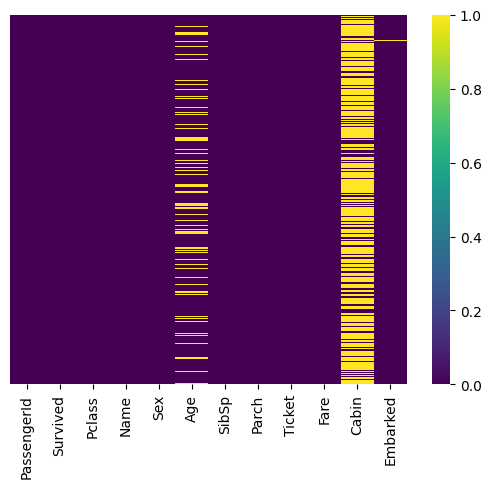

In [10]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [11]:
train['Cabin'].isnull().sum()/len(train)  

# 77% of the data in cabin column is missing so dropping it is better

0.7710437710437711

**Test data**

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
test['Cabin'].isnull().sum()/len(test)

0.7822966507177034

In [14]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [15]:
test['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

# Bar chart for Categorical Variables

def bar_chart(features):
    survived = train[train['Survived']==1][features].value_counts()
    dead = train[train['Survived']==0][features].value_counts()
    #df = pd.DataFrame([survived,dead])
    df = pd.DataFrame([survived,dead],index=['Survived','Dead'])
    #print(df)
    #df.index = ['Survived','Dead']
    print(df)
    df.plot(kind='bar',stacked=True,figsize=(10,5))

bar_chart('Sex')

=> Most Female survived

bar_chart('Pclass')

=> Most Category 1 people survived

bar_chart('SibSp')

bar_chart("Parch")

** up (BAR CHART) ..... down (COUNT PLOT)**

In [16]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

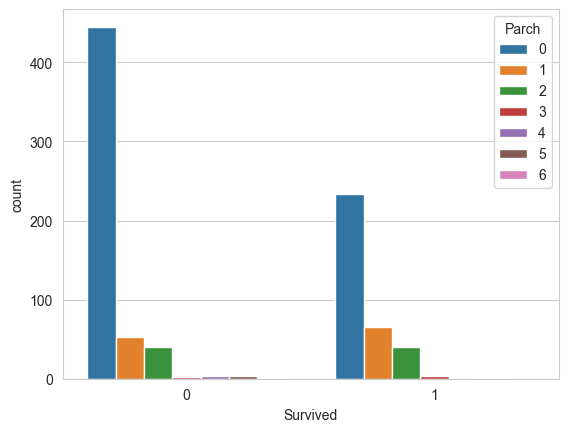

In [17]:
sns.countplot(x=train['Survived'],hue=train['Parch'])

<Axes: xlabel='Survived', ylabel='count'>

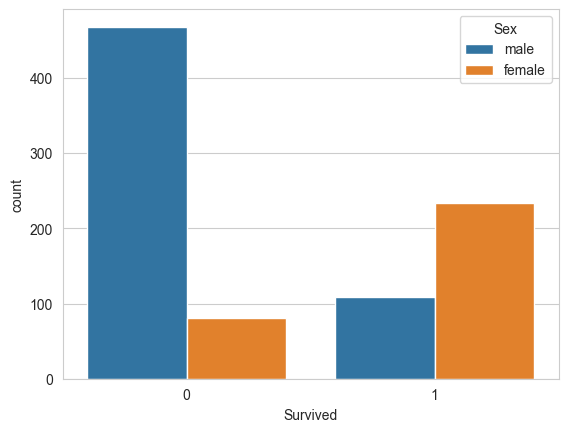

In [18]:
sns.countplot(x=train['Survived'],hue=train['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

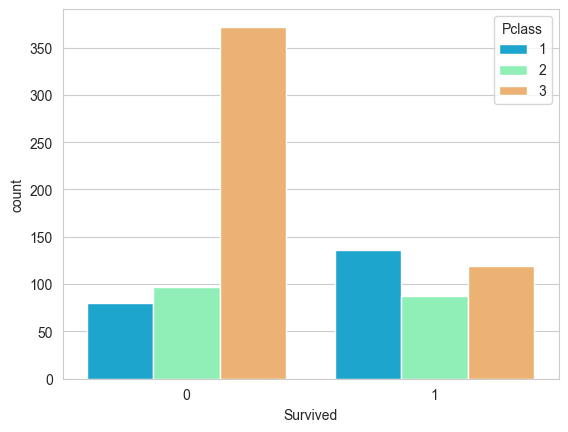

In [19]:
sns.countplot(x=train['Survived'],hue=train['Pclass'],palette='rainbow')

In [20]:
len(train['Survived'])

891

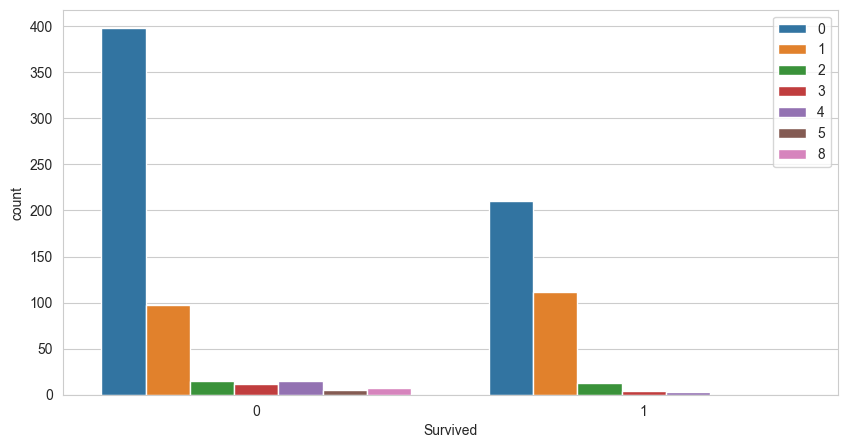

In [21]:
#fig = plt.gcf()
#fig.set_size_inches(8, 8)
#g=sns.countplot(train['Survived'],hue=train['SibSp'])
plt.figure(figsize=(10,5))
sns.countplot(x=train['Survived'],hue=train['SibSp'])
plt.legend(loc='upper right')

<Axes: xlabel='Age'>

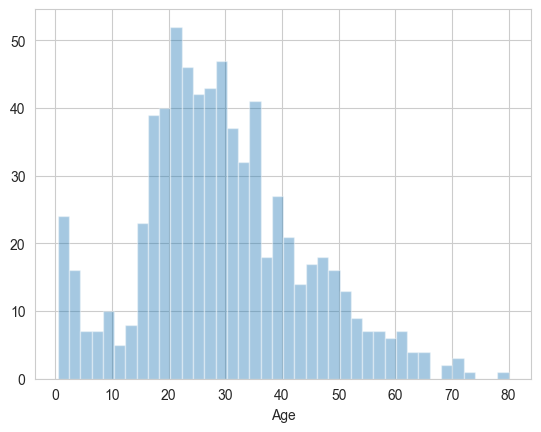

In [22]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

<Axes: xlabel='Fare'>

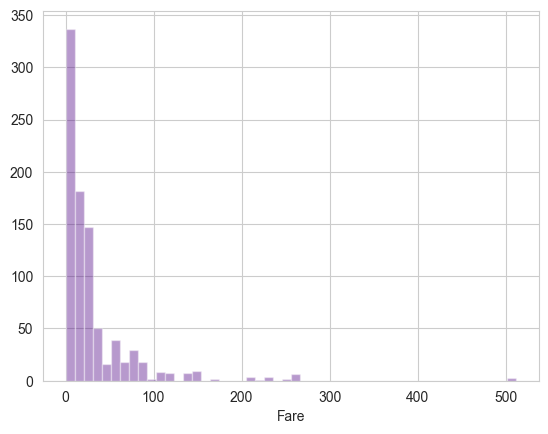

In [23]:
sns.distplot(train['Fare'],kde=False,bins=50,color='indigo')

**DATA CLEANING**

WE wish to fill the missing values of Age and Cabin column

<Axes: xlabel='Pclass', ylabel='Age'>

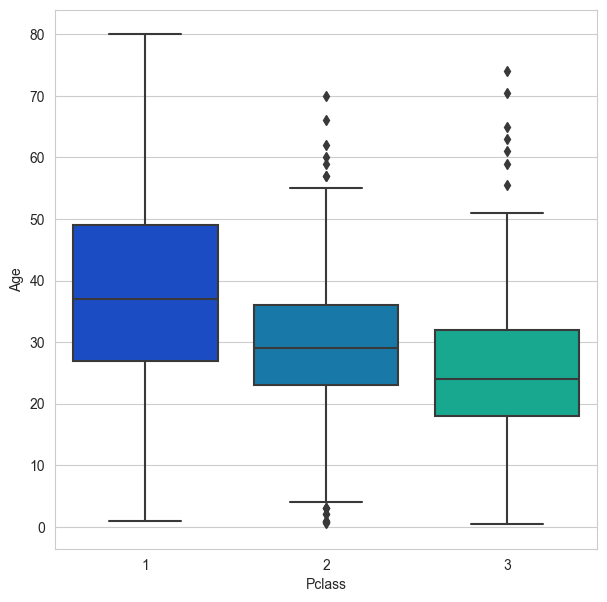

In [24]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [25]:
def impute_age(cols):
        Age = cols[0]
        Pclass = cols[1]
        
        if pd.isnull(Age):
            
            if Pclass==1:
                return 37
            
            elif Pclass==2:
                return 29
            
            else:
                return 24
        
        else:
            return Age


**Now applying that function**

     df['column']=df.apply(function,axis=1)               ## syntax of apply , axis=1 => in column ##
       
     we are only imputing age here
       
     The apply() method takes each element in the Series train[['Age','Pclass']] and applies the impute_age function on it.

In [26]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)              #=> change in column 

We can do binning for age values

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

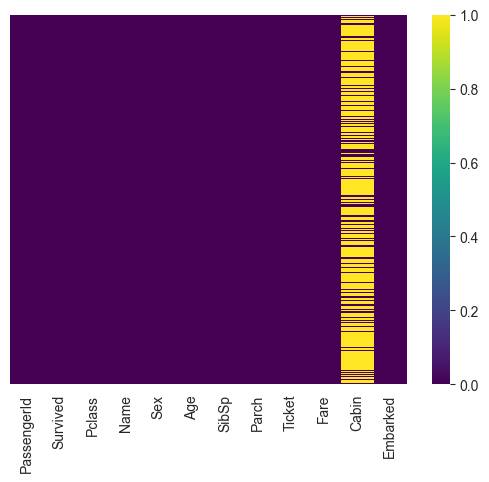

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [29]:
train['Cabin'].value_counts().head(30)

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
Name: Cabin, dtype: int64

In [30]:
train.drop('Cabin',axis=1,inplace=True)      # Cabin dropped

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Converting Categorical Variables

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

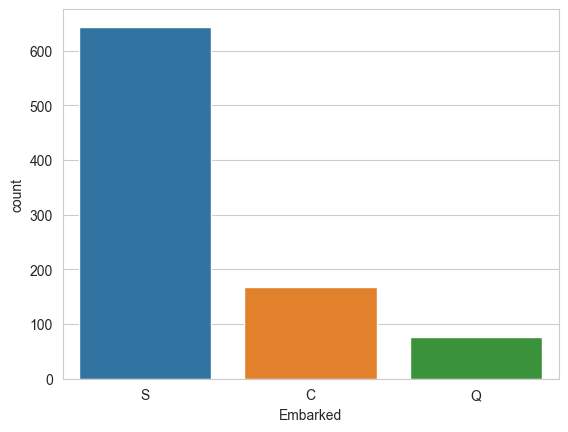

In [35]:
sns.countplot(x=train['Embarked'])

Minsuk

In [36]:
train_test_data =[train,test]

for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [37]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [38]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [39]:
# mapping can be done with the label encoder 
title_mapping = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,
                'Dr':4,'Rev':4,'Major':4,'Mlle':4,'Col':4,'Jonkheer':4,'Countess':4,'Sir':4,'Ms':4,'Mme':4,'Don':4,'Lady':4,'Capt':4,}

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


<Axes: xlabel='Survived', ylabel='count'>

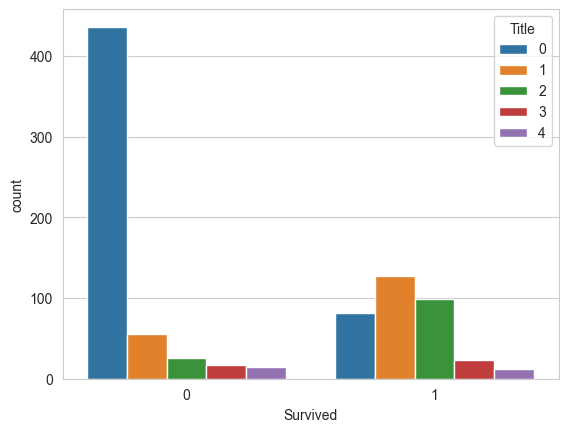

In [42]:
sns.countplot(x=train['Survived'],hue=train['Title'])   #title k hisab se kitne survived

'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3,

'Dr':4,'Rev':4,'Major':4,'Mlle':4,'Col':4,'Jonkheer':4,'Countess':4,'Sir':4,'Ms':4,'Mme':4,'Don':4,'Lady':4,'Capt':4,

# **Sex**
* male: 0, female: 1

In [43]:
sex_mapping ={'male':0,'female':1}


for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

<Axes: xlabel='Survived', ylabel='count'>

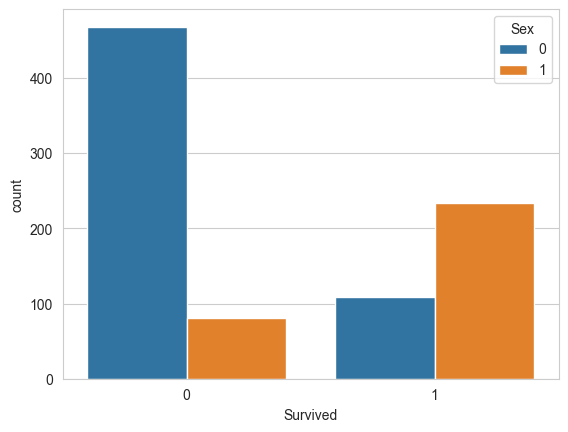

In [44]:
sns.countplot(x=train['Survived'],hue=train['Sex'])

In [45]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64


In [46]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].fillna('S')

In [47]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [49]:
train['Pclass']=train['Pclass'].astype('object')

In [50]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

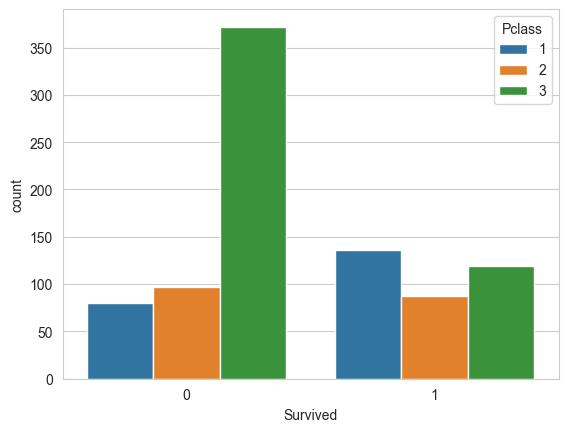

In [51]:
sns.countplot(x=train['Survived'],hue=train['Pclass'])

Dropping the unnecessary columns

In [52]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [53]:
train=pd.get_dummies(train)

train.drop(['Name','Ticket'],axis=1,inplace=True)

pd.concat([train,sex,embark],axis=1)

# Cross Validation

In [54]:
'''from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
K_fold =KFold()'''

'from sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\nK_fold =KFold()'

# Logistic Regression Model

In [55]:
x= train.drop(['Survived'],axis=1)
y= train['Survived']

In [56]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y,test_size=0.30)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Title        891 non-null    int64  
 8   Pclass_1     891 non-null    uint8  
 9   Pclass_2     891 non-null    uint8  
 10  Pclass_3     891 non-null    uint8  
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(6)
memory usage: 61.0 KB


In [59]:
logmodel = LogisticRegression()
logmodel.fit(train_x,train_y)

LogisticRegression()

In [60]:
predictions =logmodel.predict(test_x)  # predicts the values of test_y

In [61]:
from sklearn.metrics import confusion_matrix

accuracy = confusion_matrix(test_y,predictions)
accuracy

array([[153,  12],
       [ 34,  69]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
accuracy1= accuracy_score(test_y,predictions)
accuracy1

0.8283582089552238

# Decission Tree Model

In [63]:
from sklearn.tree import DecisionTreeClassifier as DTS

In [64]:
dts1=DTS()
dts1.fit(train_x,train_y)

DecisionTreeClassifier()

In [65]:
predictions_tree = dts1.predict(test_x)
accuracy_2 = confusion_matrix(test_y,predictions_tree)
accuracy_2

array([[140,  25],
       [ 37,  66]], dtype=int64)

In [66]:
accuracy_3= accuracy_score(test_y,predictions_tree)
accuracy_3

0.7686567164179104

train['embarked'].unique()

# Support Vector Machines

In [67]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x, train_y)
Y_pred = svc.predict(test_x)
accuracy_svc = confusion_matrix(test_y,Y_pred)
print(accuracy_svc)
acc_svc = accuracy_score(test_y,Y_pred) 
acc_svc

[[162   3]
 [ 92  11]]


0.6455223880597015